### CREATING DATAFRAMES


In [101]:
#From a list of dictionaries
d = [{'M': 'Lab', 'N': '17', '0':' M'} ,{'M': 'PuG', 'N': '12', '0':' F'}] #each dictionary represents a row
 
# Creates DataFrame.
dd = pd.DataFrame(d)
 
# Print the data
dd

,M,N,0
0,Lab,17,M
1,PuG,12,F


In [102]:
#From a  dictionarie OF lists
data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}  #each key represents a column

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
# print dataframe.
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


In [2]:
import pandas as pd
 
# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
# print dataframe.
df

,Name,Age
0,tom,10
1,nick,15
2,juli,14


In [4]:
data = [{'M': 'Lab', 'N': 'Pug', '0':' Ger'} ]
 
# Creates DataFrame.
df = pd.DataFrame(data)
 
# Print the data
df

,M,N,0
0,Lab,Pug,Ger


**REMOVING DUPLICATES**

In [5]:
data = {'Name':['Tom', 'nick', 'krish'],
        'Breed':['Lab', 'Lab', 'Pug']}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
df

,Name,Breed
0,Tom,Lab
1,nick,Lab
2,krish,Pug


In [6]:
df['Pure'] = [True,True,True]
df

,Name,Breed,Pure
0,Tom,Lab,True
1,nick,Lab,True
2,krish,Pug,True


In [7]:
df_breed = df.drop_duplicates(subset=["Breed"])
df_breed #removes duplicates

,Name,Breed,Pure
0,Tom,Lab,True
2,krish,Pug,True


In [8]:
df_breed = df.drop_duplicates(subset=["Breed","Name"])
df_breed #removes duplicates

,Name,Breed,Pure
0,Tom,Lab,True
1,nick,Lab,True
2,krish,Pug,True


In [9]:
h = df[(df["Pure"])].drop_duplicates(subset="Breed")
h

,Name,Breed,Pure
0,Tom,Lab,True
2,krish,Pug,True


### COUNTING DATA

In [10]:
# Get the proportion of breeds of each type
s =  df["Breed"].value_counts(normalize=True)
print(s)

# Count the number of each name and sort
dept_counts_sorted = df["Name"].value_counts(sort=False)
print(dept_counts_sorted)

Lab    0.666667
Pug    0.333333
Name: Breed, dtype: float64
Tom      1
nick     1
krish    1
Name: Name, dtype: int64


### MAX VALUE IN A COLUMN

In [110]:
import pandas as pd
 
# initialize list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age'])
 
# print dataframe.
df
col ='Age'

max_x = df.loc[df[col].idxmax()]
print( "Maximum value of column ", col, " and its corresponding row values:\n", max_x)

Maximum value of column  Age  and its corresponding row values:
 Name    nick
Age       15
Name: 1, dtype: object


In [11]:
# making a dict of list   
sale = {'type':['A', 'B', 'C','A'],
        'weekly_sales':[25, 50, 100,20]}  
sales = pd.DataFrame(sale) 
print(sales)

  type  weekly_sales
0    A            25
1    B            50
2    C           100
3    A            20


In [12]:
# sum of all salary stored in 'total'  
sum1 = sales['weekly_sales'].sum()     
print(sum1)

195


## SUBSETTING

In [13]:
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

sales_propn_by_type = [sales_A,sales_B, sales_C] / sum1
print(sales_propn_by_type)


[0.23076923 0.25641026 0.51282051]


In [46]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
print(sales_by_type)

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A     45
B     50
C    100
Name: weekly_sales, dtype: int64
type
A    0.230769
B    0.256410
C    0.512821
Name: weekly_sales, dtype: float64


In [15]:
sales['is_holiday'] = [True,True,False,False]
print(sales)
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

  type  weekly_sales  is_holiday
0    A            25        True
1    B            50        True
2    C           100       False
3    A            20       False
type  is_holiday
A     False          20
      True           25
B     True           50
C     False         100
Name: weekly_sales, dtype: int64


##### AGGREGATION FUNCS

In [48]:
print(sales)
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

  type  weekly_sales  is_holiday
0    A            25        True
1    B            50        True
2    C           100       False
3    A            20       False
      amin  amax   mean  median
type                           
A       20    25   22.5    22.5
B       50    50   50.0    50.0
C      100   100  100.0   100.0


## PIVOT TABLE USAGE

In [17]:
mean_sales_by_type = sales.pivot_table(values='weekly_sales',index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A             22.5
B             50.0
C            100.0


In [18]:
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

             mean       median
     weekly_sales weekly_sales
type                          
A            22.5         22.5
B            50.0         50.0
C           100.0        100.0


In [19]:
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday  False  True
type                   
A            20.0  25.0
B             NaN  50.0
C           100.0   NaN


In [20]:
print(sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday",fill_value=0))

is_holiday  False  True
type                   
A              20    25
B               0    50
C             100     0


In [21]:
print(sales.pivot_table(values="weekly_sales", index="is_holiday", columns="type", fill_value=0, margins=True))

type           A   B    C    All
is_holiday                      
False       20.0   0  100  60.00
True        25.0  50    0  37.50
All         22.5  50  100  48.75


## WORKING WITH INDEXES

In [22]:
print(sales)

  type  weekly_sales  is_holiday
0    A            25        True
1    B            50        True
2    C           100       False
3    A            20       False


In [23]:
sales.columns

Index(['type', 'weekly_sales', 'is_holiday'], dtype='object')

In [24]:
sales.index

RangeIndex(start=0, stop=4, step=1)

In [25]:
sales_ind =sales.set_index("type") #converts a column into index
print(sales_ind)

      weekly_sales  is_holiday
type                          
A               25        True
B               50        True
C              100       False
A               20       False


In [26]:
sales_ind.reset_index()

,type,weekly_sales,is_holiday
0,A,25,True
1,B,50,True
2,C,100,False
3,A,20,False


In [27]:
sales_ind.reset_index(drop="True") #removes the index column entirely

,weekly_sales,is_holiday
0,25,True
1,50,True
2,100,False
3,20,False


In [28]:
df

,Name,Breed,Pure
0,Tom,Lab,True
1,nick,Lab,True
2,krish,Pug,True


In [29]:
df_ind =df.set_index("Name") #converts a column into index
print(df_ind)

      Breed  Pure
Name             
Tom     Lab  True
nick    Lab  True
krish   Pug  True


In [30]:
df[df["Name"] .isin([ "Tom","nick"])]   #subsetting dataframes

,Name,Breed,Pure
0,Tom,Lab,True
1,nick,Lab,True


In [31]:
df_ind.loc[[ "Tom","nick"]]

,Breed,Pure
Name,,
Tom,Lab,True
nick,Lab,True


In [32]:
sales

,type,weekly_sales,is_holiday
0,A,25,True
1,B,50,True
2,C,100,False
3,A,20,False


In [33]:
sales_ind =sales.set_index(["type","weekly_sales"]) #multilevelindex
print(sales_ind)

                   is_holiday
type weekly_sales            
A    25                  True
B    50                  True
C    100                False
A    20                 False


In [34]:
sales_ind.loc[[ "A","C"]]

is_holiday
type weekly_sales            
A    25                  True
     20                 False
C    100                False

In [35]:
sales_ind.loc[[ ("A",25),("C",100)]]

,,is_holiday
type,weekly_sales,
A,25,True
C,100,False


In [36]:
sales_ind.sort_index()

is_holiday
type weekly_sales            
A    20                 False
     25                  True
B    50                  True
C    100                False

In [37]:
sales_ind.sort_index (level=["type", "weekly_sales"], ascending=[True, False])

is_holiday
type weekly_sales            
A    25                  True
     20                 False
B    50                  True
C    100                False

## Slicing and subsetting with .loc and .iloc 

In [38]:
sales_ind

,,is_holiday
type,weekly_sales,
A,25,True
B,50,True
C,100,False
A,20,False


In [39]:
sales_sort= sales_ind.sort_index()
sales_sort

is_holiday
type weekly_sales            
A    20                 False
     25                  True
B    50                  True
C    100                False

In [40]:
sales_sort.loc["A":"C"] #NOTE : HERE LAST VALUE IS INCLUDED

is_holiday
type weekly_sales            
A    20                 False
     25                  True
B    50                  True
C    100                False

In [41]:
sales_sort.loc[20:50] #DOESN'T WORK ON INNER INDEXES

TypeError: Level type mismatch: 20

In [57]:
sales_sort.loc[("A",20):("B",50)]

is_holiday    Address
type weekly_sales                       
A    20                 False      Delhi
     25                  True  Bangalore
B    50                  True    Chennai

In [49]:
address = ['Delhi', 'Bangalore', 'Chennai', 'Patna']
 
# Using 'Address' as the column name
# and equating it to the list
sales_sort['Address'] = address
sales_sort

is_holiday    Address
type weekly_sales                       
A    20                 False      Delhi
     25                  True  Bangalore
B    50                  True    Chennai
C    100                False      Patna

In [56]:
sales_sort.loc[:"B","is_holiday":"Address"] #SLICING COLUMNS

is_holiday    Address
type weekly_sales                       
A    20                 False      Delhi
     25                  True  Bangalore
B    50                  True    Chennai

In [59]:
sales_sort.loc[("A",20):("B",50),:"Address"]

is_holiday    Address
type weekly_sales                       
A    20                 False      Delhi
     25                  True  Bangalore
B    50                  True    Chennai

In [62]:
sales_sort.iloc[0:3,0:1] #using implicit indexes

is_holiday
type weekly_sales            
A    20                 False
     25                  True
B    50                  True

#### Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

#### Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

#### Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

#### Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])

#### Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 1])

####  Use slicing to get the first 5 rows
print(temperatures.iloc[:5])

#### Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

##### Use slicing in both directions at once
print(temperatures.iloc[:5, 2:4])

In [63]:
sales_ind

,,is_holiday
type,weekly_sales,
A,25,True
B,50,True
C,100,False
A,20,False


In [64]:
sales_ind.reset_index()

,type,weekly_sales,is_holiday
0,A,25,True
1,B,50,True
2,C,100,False
3,A,20,False


In [66]:
sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(sales_by_type_holiday)

is_holiday  False  True
type                   
A            20.0  25.0
B             NaN  50.0
C           100.0   NaN


In [65]:
sales_by_type_holiday.loc["A":"C"]

NameError: name 'sales_by_type_holiday' is not defined

In [67]:
sales_by_type_holiday.mean(axis="index")

is_holiday
False    60.0
True     37.5
dtype: float64

In [68]:
sales_by_type_holiday.mean(axis="columns")

type
A     22.5
B     50.0
C    100.0
dtype: float64

#### Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

#### Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c", index = ["country", "city"], columns = "year")

#### See the result
print(temp_by_country_city_vs_year)


year                              2000    2001    2002    2003    2004  
country       city                                                                                           
Afghanistan   Kabul             15.823  15.848  15.715  15.133  16.128  
Angola        Luanda            24.410  24.427  24.791  24.867  24.216  

In [69]:
sales_by_type_holiday

is_holiday,False,True
type,,
A,20.0,25.0
B,NaN,50.0
C,100.0,NaN


In [70]:
# Get the worldwide mean temp by year
mean_is_holiday_by_type = sales_by_type_holiday.mean()
mean_is_holiday_by_type 



is_holiday
False    60.0
True     37.5
dtype: float64

In [71]:
# Filter for the year that had the highest mean temp
print(mean_is_holiday_by_type[mean_is_holiday_by_type == mean_is_holiday_by_type.max()])



is_holiday
False    60.0
dtype: float64


***DATA VISUALIZATION***

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
# making a dict of list   
sale = {'type':['A', 'B', 'C','A'],'price':[1, 2, 3,4],
        'weekly_sales':[25, 50, 100,20],'holiday':[True, False, True,True]}  
sales = pd.DataFrame(sale) 
print(sales)

  type  price  weekly_sales  holiday
0    A      1            25     True
1    B      2            50    False
2    C      3           100     True
3    A      4            20     True


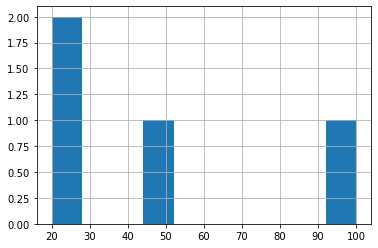

In [73]:
sales["weekly_sales"].hist()
plt.show()

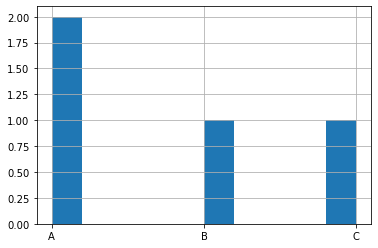

In [74]:
sales["type"].hist(bins=10)
plt.show()

In [75]:
mean_sales_by_type 

,weekly_sales
type,
A,22.5
B,50.0
C,100.0


<AxesSubplot:title={'center':'Mean sales by type'}, xlabel='type'>

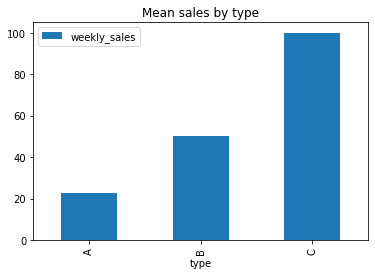

In [76]:
mean_sales_by_type .plot(kind="bar",title="Mean sales by type")

<AxesSubplot:xlabel='price'>

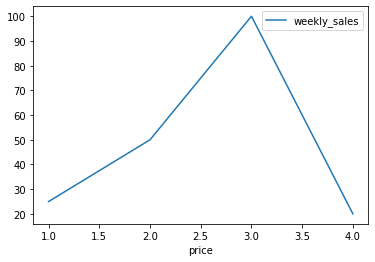

In [77]:
sales.plot(x="price",y="weekly_sales",kind="line")

<AxesSubplot:xlabel='price'>

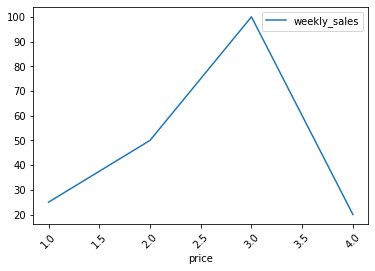

In [78]:
sales.plot(x="price",y="weekly_sales",kind="line",rot=45)

<AxesSubplot:xlabel='type', ylabel='weekly_sales'>

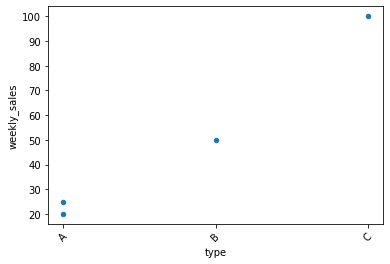

In [79]:
sales.plot(x="type",y="weekly_sales",kind="scatter",rot=45)

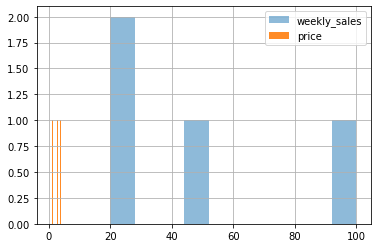

In [80]:
sales["weekly_sales"].hist(bins=10,alpha=0.5)
sales["price"].hist(bins=10,alpha=0.9)
plt.legend(["weekly_sales","price"])

### Missing Values 28 June 2022

In [81]:
sales


,type,price,weekly_sales,holiday
0,A,1,25,True
1,B,2,50,False
2,C,3,100,True
3,A,4,20,True


In [83]:
#delete values in the dataframe
sales.drop(sales.index[sales['price'] ==  2], inplace = True)
sales

,type,price,weekly_sales,holiday
0,A,1,25,True
2,C,3,100,True
3,A,4,20,True


In [87]:
 da = pd.DataFrame([{ 'a' : 0,'b' : 1,'d': 3}, {'b': 2, 'c' : 4}])
 da

,a,b,d,c
0,0.0,1,3.0,NaN
1,NaN,2,NaN,4.0


In [90]:
da.isna().any() #detects if there are any missing value in each column

a     True
b    False
d     True
c     True
dtype: bool

In [91]:
da.isna()

,a,b,d,c
0,False,False,False,True
1,True,False,True,False


In [92]:
da.isna().sum()

a    1
b    0
d    1
c    1
dtype: int64

In [98]:
da.dropna() #drops rows where data is missing

,a,b,d,c


In [96]:
da.fillna(1) #fills any missing value with 1

,a,b,d,c
0,0.0,1,3.0,1.0
1,1.0,2,1.0,4.0


<AxesSubplot:>

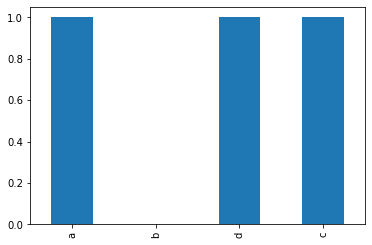

In [97]:
da.isna().sum().plot(kind ="bar")

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'c'}>],
       [<AxesSubplot:title={'center':'d'}>, <AxesSubplot:>]], dtype=object)

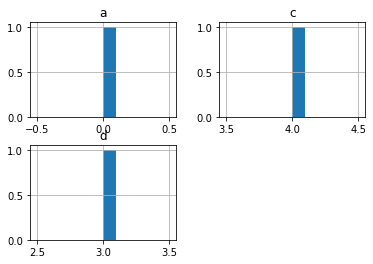

In [99]:
da[["a", "c", "d"]].hist()

### READING AND WRITING CSV's 28/7/22

CSV = Comma Separated Values
Used to store tabular data

In [104]:
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


In [105]:
df.to_csv("df.csv")
df.csv

AttributeError: 'DataFrame' object has no attribute 'csv'

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping)

### IMPORTANT FUNCTIONS

### SET = finds unique values set(xyz)
###  tail(n) = finds last n values
### nlargest(3, 'file') = prints largest 3 values in file column

# -QUES-